In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)



In [34]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [82]:
def plot_datetime(df, title="", 
                  highlight=True, 
                  weekend=5, 
                  ylabel="",
                  saveloc=None, 
                  facecolor='green', 
                  alpha_span=0.2):
    """
    Draw a plot of a dataframe that has datetime object as its index
    df(pandas) = pandas dataframe with datetime as indeces
    highlight(bool) = to highlight or not
    title(string) = title of plot
    saveloc(string) = where to save file
    """
    
    #instantiate fig and ax object
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,figsize=(15,5))

    #draw all columns of dataframe
    for v in df.columns.tolist():
        axes.plot(df[v], label=v, alpha=.8)
        
    if highlight:
        #find weekend indeces
        weekend_indices = find_weekend_indices(df.index, weekend=5)
        #highlight weekends
        highlight_datetimes(weekend_indices, axes, df, facecolor)

    #set title and y label
    axes.set_title(title, fontsize=12)
    axes.set_ylabel(ylabel)
    axes.legend()
    plt.tight_layout()
    
    #add xaxis gridlines
    axes.xaxis.grid(b=True, which='major', color='black', linestyle='--', alpha=1) 

    #savefig if
    if saveloc:
        fig.savefig(saveloc)
    plt.show()
    

In [3]:
def conditions(s):
    if (s['Master_marca_atraso'] == '1') or (s['Visa_marca_atraso'] == '1') :
        return 1
    else:
        return 0

In [4]:
def target(s):
    if (s['Mes_1'] == 1) or (s['Mes_2'] == 1) :
        return 1
    else:
        return 0

In [5]:
df = pd.read_csv('MESES_hasta_201404.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,47,81,83) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Exploratorio Inicial

In [6]:
df.head(10)

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo
0,3333,201312,1,0,455,0,0,-50821769.98,0.000000e+00,-56507789.49,-1665338.97,6525184.71,0,S,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,N,0.00,0.0,0.0,0.00,0.00,N,0,0.00,N,0,0.00,N,0,0.0,0,0.0,0,0.0,0,0.0,N,0.0,0.0,N,0.0,0.0,N,0.0,N,N,N,N,N,0,0,0,N,0.0,0.0,0,N,0,N,0,N,0,N,0,N,0,0,0.0,0,0,0,0.0,0,0,0,0.00,0,0.00,N,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,N,0,N,0,N,0,N,N,N,N,N,0,0.0,0,0.0,N,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.
1,3333,201312,1,0,455,0,0,-22714055.16,0.000000e+00,-18918151.60,2381

# Transformación de Variables y Feature Engineering

In [7]:
#meter un shift para ver si al mes siguiente tuvo mora o a los dos meses. 
df['Marca_Atraso_Global'] = df.apply(conditions, axis=1)

In [8]:
# Creo un lag (lo voy a usar para crear la variable objetivo a dos meses)
df['Mes_1'] = df.groupby(['numero_de_cliente'])['Marca_Atraso_Global'].shift(-1)
df['Mes_2'] = df.groupby(['numero_de_cliente'])['Marca_Atraso_Global'].shift(-2)

In [9]:
df=df[df.foto_mes <= 201402]


In [10]:
#meter un shift para ver si al mes siguiente tuvo mora o a los dos meses. 
df['target'] = df.apply(target, axis=1)

# Muestra

In [11]:
#Realizamos un muestreo del 20% sobre la población total

sample_df = df.sample(int(len(df) * 0.2))
sample_df.shape

(465349, 173)

## Validación Muestra

In [12]:
s = df.target
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
0,2264928,0.973431,97.34%
1,61820,0.026569,2.66%


In [13]:
s = sample_df.target
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
0,453012,0.973489,97.35%
1,12337,0.026511,2.65%


# Exploratorio Sample

Index(['numero_de_cliente', 'foto_mes', 'marketing_activo_ultimos90dias',
       'cliente_vip', 'cliente_sucursal', 'cliente_edad', 'cliente_antiguedad',
       'mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       ...
       'Visa_mpagosdolares', 'Visa_fechaalta', 'Visa_mconsumototal',
       'Visa_tconsumos', 'Visa_tadelantosefectivo', 'Visa_mpagominimo',
       'Marca_Atraso_Global', 'Mes_1', 'Mes_2', 'target'],
      dtype='object', length=173)

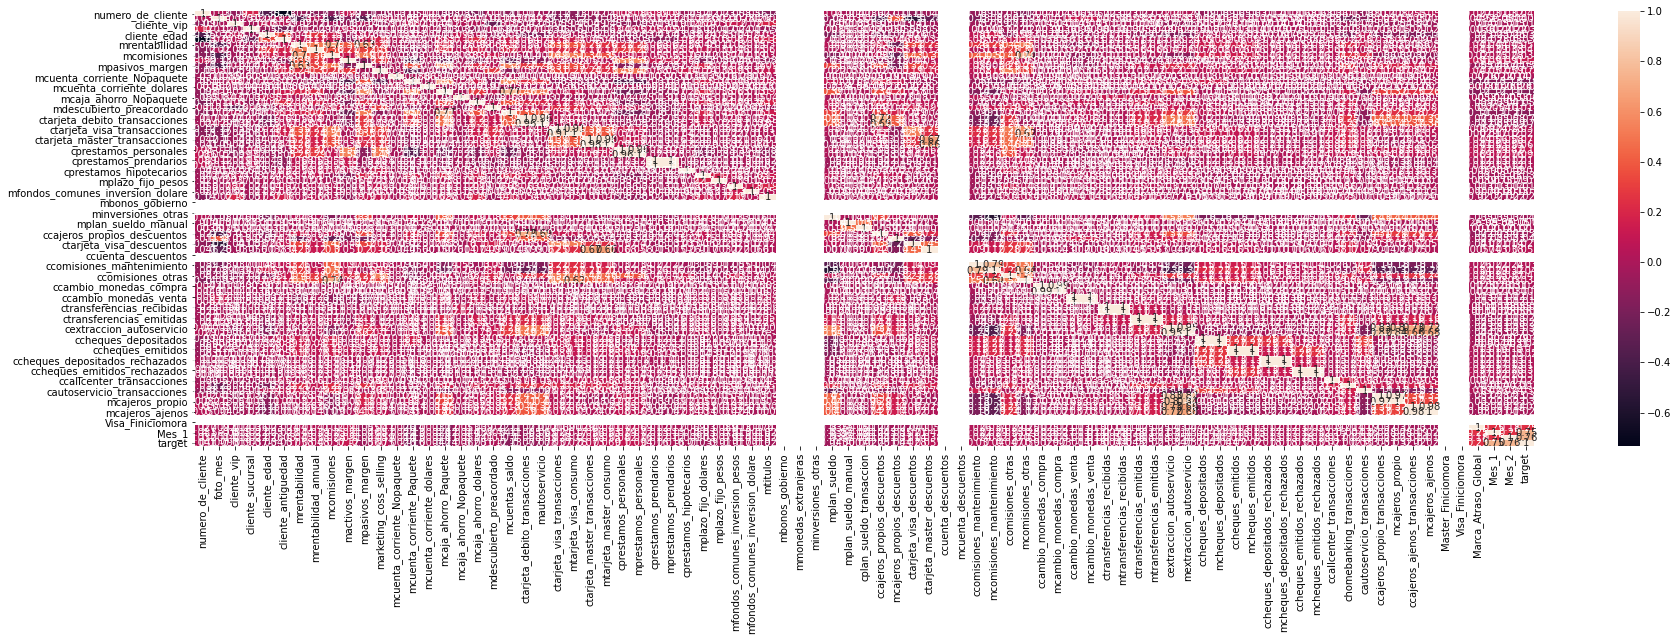

In [14]:
corr = sample_df.corr(method='spearman')
plt.figure(figsize=(30,8))
sns.heatmap(corr, annot=True)
sample_df.columns

In [15]:
sample_df.head()

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,Marca_Atraso_Global,Mes_1,Mes_2,target
671763,10026958,201306,1,0,2,35,194,517.94,9256.40,434.50,-155.54,226.86,10,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,14967.03,0.0,8.88,1.17,30161.66,S,18,4584.62,S,16,4573.88,S,22,5184.97,0,0.00,0,0.0,0,0,N,0.00,0.0,S,55935.71,0.0,N,0.0,N,N,S,N,N,0,0,0,S,38756.25,0.0,0,S,400.51,S,1312.69,S,942.47,N,0,N,0,18,0.0,12,0,18,0.0,0,0,0,0.00,61,431.27,N,0,0.0,0,0.0,0,0.0,1,2392.06,20,11349.0,0,0.0,0,0.00,0,0.0,0,0.0,N,0,S,43,N,0,N,N,N,N,N,11,6084.0,9,5265.0,S,0,10,39247.32,20180331,NaN,4879.5,4385.01,494.48,1232.1,95.62,4

Text(0.5, 1.0, 'Antiguedad Clientes VIP')

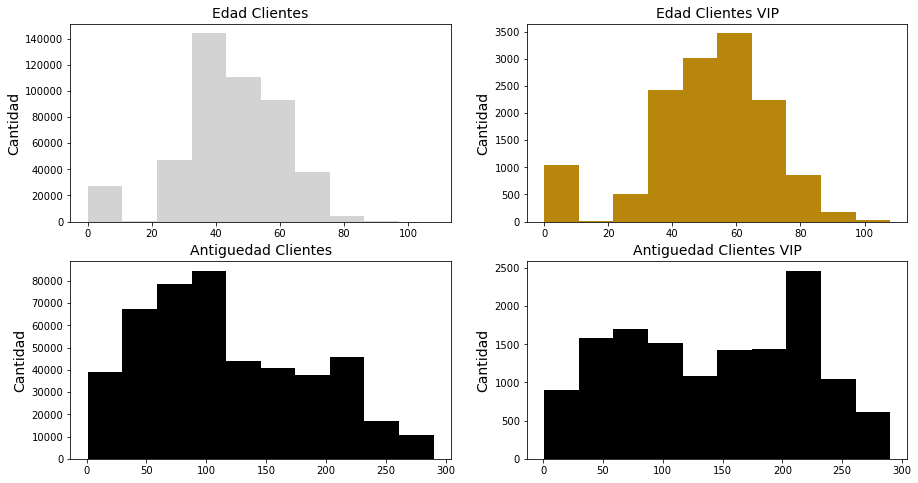

In [16]:
fig,a =  plt.subplots(2,2, figsize = (15,8))

a[0][0].hist(sample_df.cliente_edad,color = 'lightgrey')

a[0][0].set_ylabel('Cantidad',size = 14)
a[0][0].set_title('Edad Clientes',size = 14)
a[0][1].hist(sample_df[sample_df['cliente_vip'] == 1].cliente_edad,color = 'darkgoldenrod')
a[0][1].set_ylabel('Cantidad',size = 14)
a[0][1].set_title('Edad Clientes VIP',size = 14)

a[1][0].hist(sample_df.cliente_antiguedad,color = 'Black')
a[1][0].set_ylabel('Cantidad',size = 14)
a[1][0].set_title('Antiguedad Clientes',size = 14)

a[1][1].hist(sample_df[sample_df['cliente_vip'] == 1].cliente_antiguedad,color = 'Black')
a[1][1].set_ylabel('Cantidad',size = 14)
a[1][1].set_title('Antiguedad Clientes VIP',size = 14)

a[1][1].hist(sample_df[sample_df['cliente_vip'] == 1].cliente_antiguedad,color = 'Black')
a[1][1].set_ylabel('Cantidad',size = 14)
a[1][1].set_title('Antiguedad Clientes VIP',size = 14)

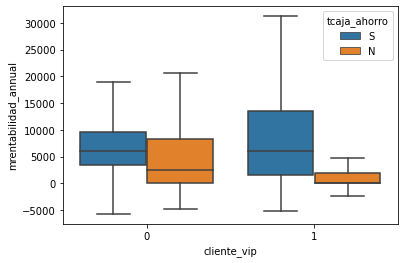

In [17]:
visualcat20 = sns.boxplot(x="cliente_vip", y="mrentabilidad_annual", hue="tcaja_ahorro", showfliers=False, data=sample_df)



In [64]:
sample_df['YYYYMM'] = pd.to_datetime(sample_df['foto_mes'], format='%Y%m', errors='coerce').dropna()


In [75]:
df_tiempo[df_tiempo['target'] == 1 ]

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,Marca_Atraso_Global,Mes_1,Mes_2,target,Año,Mes
YYYYMM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-07-01,28895407,201307,1,0,230,33,82,656.15,11929.23,524.25,61.06,51.68,12,S,N,N,N,N,N,N,N,N,S,S,0.0,-2358.56,0.0,S,2845.45,0.0,0.00,1.17,4414.46,S,2,93.89,S,25,6555.43,S,14,2833.92,0,0.00,0,0.0,0,0,N,0.0,0.0,N,0.0,0.0,N,0.0,N,N,S,N,S,0,0,0,N,0.00,0.0,0,S,11.68,S,1210.16,N,0,N,0,N,0,2,0.00,3,0,2,0.0,0,0,1,183.92,7,535.6

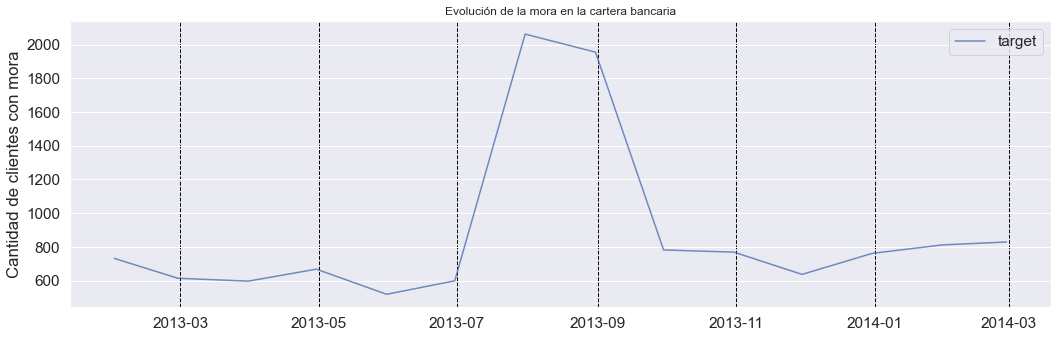

In [81]:
df_tiempo = sample_df.set_index('YYYYMM')
df_tiempo['Año'] = df_tiempo.index.year                                
df_tiempo['Mes'] = df_tiempo.index.month                                
df_tiempo.sample(8, random_state=0)    



test = df_tiempo[df_tiempo['target'] == 1 ][['target']].groupby(pd.Grouper(freq='1M')).count()

plot_datetime(test,title='Evolución de la mora en la cartera bancaria',highlight=False,ylabel="Cantidad de clientes con mora")



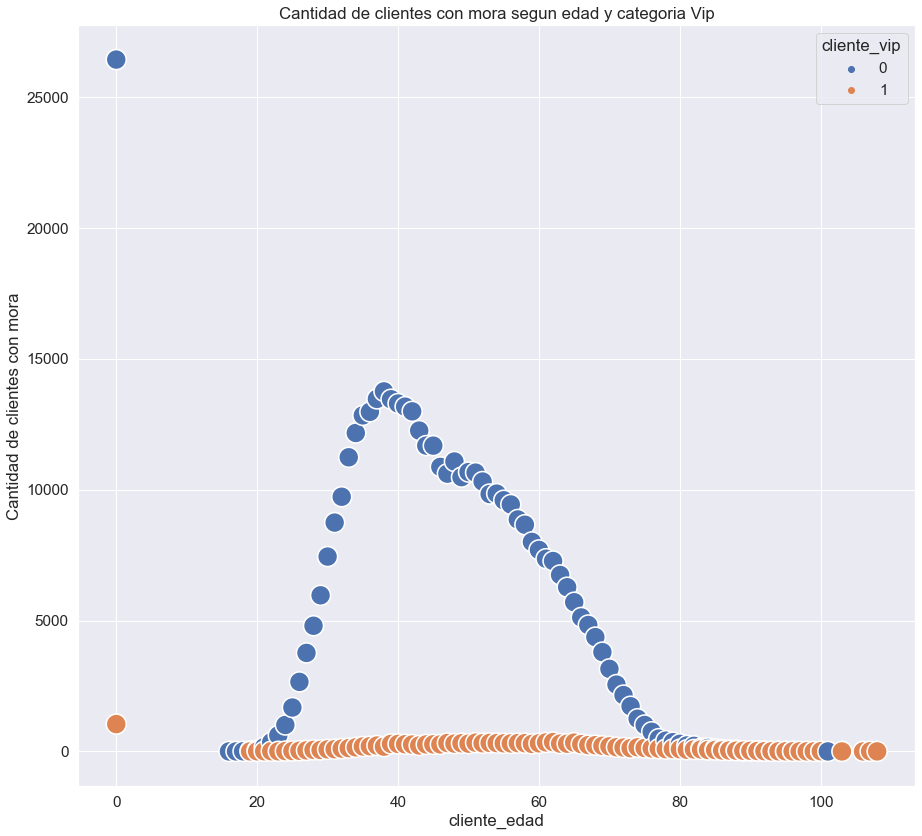

In [80]:
box = df_tiempo[['target','cliente_vip','cliente_edad']].groupby(by=["cliente_edad","cliente_vip"],as_index=False).count()
fig, ax1 = plt.subplots(1, figsize=(15, 14), sharex=True)


sns.scatterplot(data=box,x='cliente_edad',y='target',s=400,hue = 'cliente_vip',ax=ax1)
ax1.set_title("Cantidad de clientes con mora segun edad y categoria Vip")
ax1.set_ylabel('Cantidad de clientes con mora')
plt.show()

Text(0.5, 1.0, 'Correlation con variable target \n')

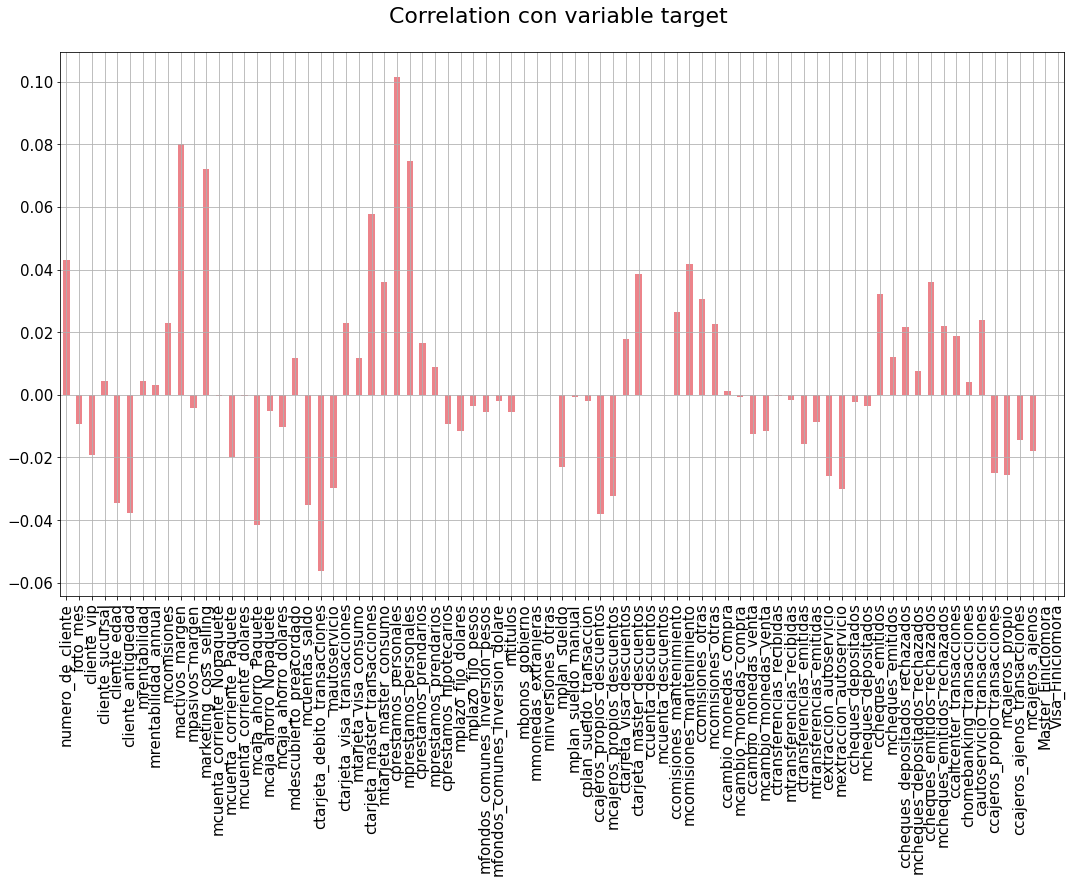

In [27]:
correlations = sample_df.drop(['target','Marca_Atraso_Global','Mes_1','Mes_2'], axis='columns').corrwith(sample_df.target)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 90, grid = True)
plt.title('Correlation con variable target \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

# Modelo ML

In [19]:
s = df.target
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
0,2264928,0.973431,97.34%
1,61820,0.026569,2.66%


In [20]:
s = sample_df.target
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
0,453012,0.973489,97.35%
1,12337,0.026511,2.65%


In [21]:
X = df.drop(['target','Mes_1','Mes_2','tpaquete_premium','Master_marca_atraso','Visa_marca_atraso'] , axis='columns')
y = df.target

#GENERAMOS X E Y PARA

In [22]:
#Transformo Variables Categoricas
X = pd.get_dummies(X, columns = ['tpaquete2', 'tpaquete4', 'tpaquete6', 'tpaquete7', 'tpaquete9', 'tcuentas', 'tcuenta_corriente', 'tcaja_ahorro', 'ttarjeta_debito', 'ttarjeta_visa', 'ttarjeta_master'])

In [23]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
X = X.select_dtypes(include=numerics)
#one_hot_encoding
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
X = X.fillna(0)

In [24]:
#Creo variables
X['mcuenta_corriente_all'] = X['mcuenta_corriente_Paquete'] + X['mcuenta_corriente_Nopaquete']
X['mcaja_ahorro_all'] = X['mcaja_ahorro_Paquete'] + X['mcaja_ahorro_Nopaquete']
X['mcaja_ahorro_CC'] = X['mcaja_ahorro_all'] + X['mcuenta_corriente_all']
X['mtarjeta_all_consumo'] = X['mtarjeta_visa_consumo'] + X['mtarjeta_master_consumo']
X['ctarjeta_all_transacciones'] = X['ctarjeta_visa_transacciones'] + X['ctarjeta_master_transacciones']
#X['ctarjeta_all_transacciones'] = X['ctarjeta_visa_transacciones'] + X['ctarjeta_master_transacciones']
X.head()

,numero_de_cliente,foto_mes,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mplazo_fijo_dolares,mplazo_fijo_pesos,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,mtitulos,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,ctarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,ccallcenter_transacciones,chomebanking_transacciones,cautoservicio_transacciones,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,Master_Finiciomora,Visa_Finiciomora,Marca_Atraso_Global,tpaquete2_N,tpaquete2_S,tpaquete4_N,tpaquete4_S,tpaquete6_N,tpaquete6_S,tpaquete7_N,tpaquete7_S,tpaquete9_N,tpaquete9_S,tcuentas_N,tcuentas_S,tcuenta_corriente_N,tcuenta_corriente_S,tcaja_ahorro_N,tcaja_ahorro_S,ttarjeta_debito_N,ttarjeta_debito_S,ttarjeta_visa_N,ttarjeta_visa_S,ttarjeta_master_N,ttarjeta_master_S,mcuenta_corriente_all,mcaja_ahorro_all,mcaja_ahorro_CC,mtarjeta_all_consumo,ctarjeta_all_transacciones
0,3333,201312,0,455,0,0,-50821769.98,0.0,-56507789.49,-1665338.97,6525184.71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0.0,0.0,0.0,0.0,0
1,3333,201312,0,455,0,0,-22714055.16,0.0,-18918151.60,2381309.88,-5628062.52,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0.0,0.0,0.0,0.0,0
2,3333,201312,0,455,0,0,104820.19,0.0,129372.14,380702.56,-401687.13,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0.0,0.0,0.0,0.0,0
3,3333,201312,0,455,0,0,-3546587.05,0.0,225130.92,-2181505.34,-1042185.24,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0.0,0.0,0.0,0.0,0
4,3333,201312,0,455,0,0,-7585272.96,0.0,-4932873.63,8533479.37,-10800487.35,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0.0,0.0,0.0,0.0,0


In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [26]:
s = df.target
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
0,2264928,0.973431,97.34%
1,61820,0.026569,2.66%


In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [30]:
X_sample = sample_df.drop(['target','Mes_1','Mes_2','tpaquete_premium','Master_marca_atraso','Visa_marca_atraso'] , axis='columns')
y_sample = sample_df.target

#Transformo Variables Categoricas
X_sample = pd.get_dummies(X_sample, columns = ['tpaquete2', 'tpaquete4', 'tpaquete6', 'tpaquete7', 'tpaquete9', 'tcuentas', 'tcuenta_corriente', 'tcaja_ahorro', 'ttarjeta_debito', 'ttarjeta_visa', 'ttarjeta_master'])


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']

#Seleccionamos solamente las numericas, esto hace que se disminuya la cantidad de columnas en el DF X
X_sample = X_sample.select_dtypes(include=numerics)
#one_hot_encoding
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
X_sample = X_sample.fillna(0)

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [32]:
# import library
from imblearn.over_sampling import SMOTE
import collections
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_sample, y_sample)

#ELEVAMOS LA CLASE MINORITARIA PARA QUE QUEDE BALANCEADO

print('Original dataset shape', collections.Counter(y_sample))
print('Resample dataset shape', collections.Counter(y_smote))

Original dataset shape Counter({0: 453012, 1: 12337})
Resample dataset shape Counter({0: 453012, 1: 453012})


In [35]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_smote, y_smote)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    

Learning rate:  0.05
Accuracy score (training): 0.754
Accuracy score (validation): 0.754
Learning rate:  0.075
Accuracy score (training): 0.763
Accuracy score (validation): 0.762
Learning rate:  0.1
Accuracy score (training): 0.764
Accuracy score (validation): 0.764
Learning rate:  0.25
Accuracy score (training): 0.781
Accuracy score (validation): 0.781
Learning rate:  0.5
Accuracy score (training): 0.803
Accuracy score (validation): 0.803
Learning rate:  0.75
Accuracy score (training): 0.813
Accuracy score (validation): 0.813
Learning rate:  1
Accuracy score (training): 0.820
Accuracy score (validation): 0.819


In [36]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=2, max_depth = 2, random_state = 0)
gb.fit(x_smote, y_smote)
predictions = gb.predict(X_test)


<Figure size 2016x1440 with 0 Axes>

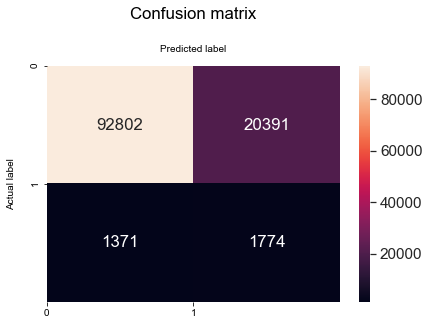

In [37]:
cm = confusion_matrix(y_test, predictions) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

plt.show()

Area under ROC curve = 0.78


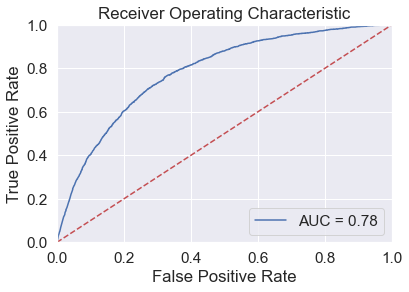

In [38]:
# ROC curve and Area-Under-Curve (AUC)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gb, tpr_gb, 'b', label = 'AUC = %0.2f' % roc_auc_gb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

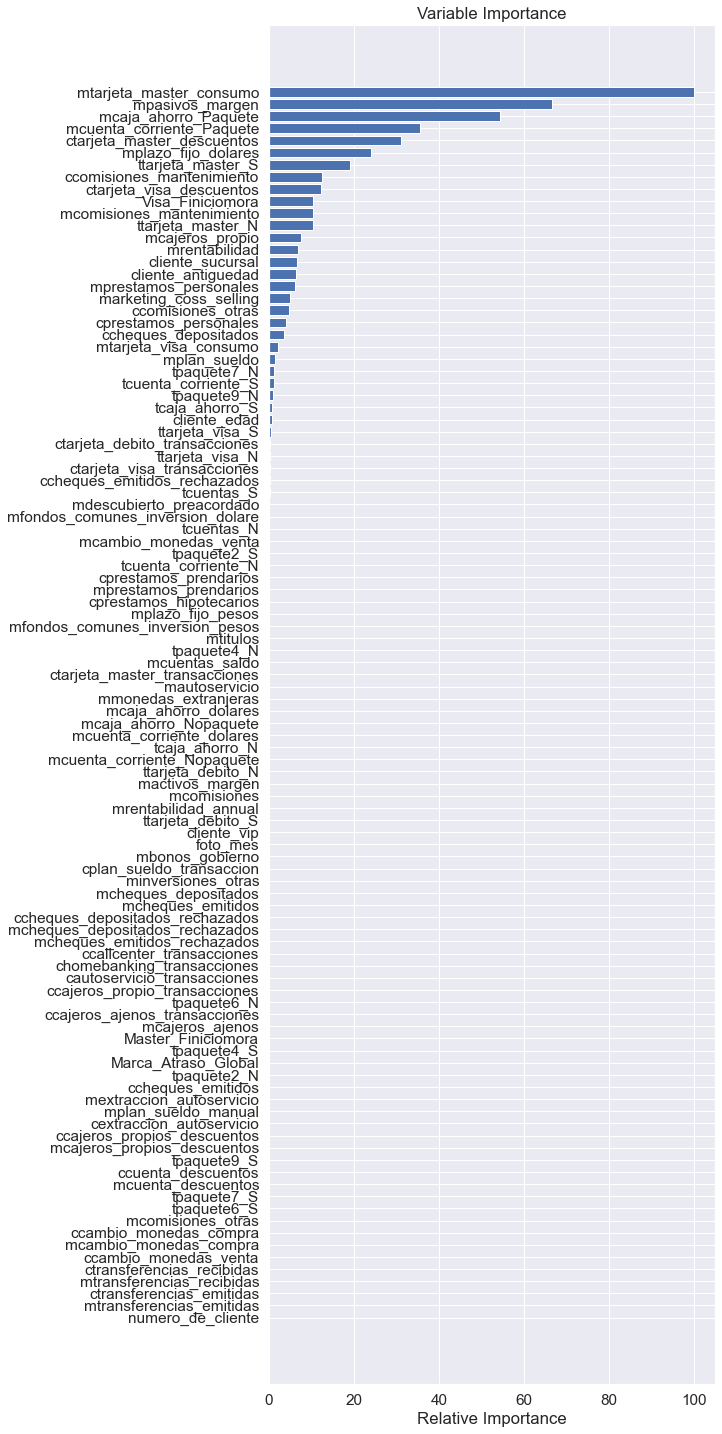

In [46]:
# Plot feature importance https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
feature_importance = gb_clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 25))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_smote.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [40]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
X_test['Tendra_mora'] = predictions

<ipython-input-41-da0ee1aeee25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Tendra_mora'] = predictions


In [42]:
X_test[['mtarjeta_master_consumo','mpasivos_margen','mcaja_ahorro_Paquete','mcuenta_corriente_Paquete','Tendra_mora']].tail(100)

,mtarjeta_master_consumo,mpasivos_margen,mcaja_ahorro_Paquete,mcuenta_corriente_Paquete,Tendra_mora
1939845,0.00,0.00,354.74,-1278.83,0
380372,0.00,168.12,13055.19,2956.75,0
263609,0.00,149.55,15262.74,0.00,0
100042,2430.00,239.38,23224.57,0.00,0
473886,1549.51,28.02,0.00,-4305.67,1
...,...,...,...,...,...
1441613,0.00,-36.83,521.14,-5.01,0
1221692,0.00,533.94,50034.79,0.00,0
467877,0.00,691.68,0.00,-0.95,0
1413841,0.00,576.91,58866.53,0.00,0


# Salida del Modelo

In [43]:
X_test[['numero_de_cliente','Tendra_mora']]

,numero_de_cliente,Tendra_mora
2206377,30859908,0
1457047,22036988,0
1039206,16992078,0
1918814,26331730,1
1185440,18215366,0
...,...,...
1441613,21789599,0
1221692,18514847,0
467877,8672993,0
1413841,21556585,0


In [87]:
X_test[X_test['Tendra_mora'] == 1 ][['numero_de_cliente','Tendra_mora','cliente_vip']].to_csv('Clientes_Mora_Futura.csv')

In [ ]:
models = []

X_train = x_smote
y_train = y_smote
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5 ,metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=0,shuffle=True)
# accuracy scoring:
cv_acc_results = model_selection.cross_val_score(  
model, X_train, y_train, cv=kfold, scoring='accuracy')
# roc_auc scoring:
cv_auc_results = model_selection.cross_val_score(  
model, X_train, y_train, cv=kfold, scoring='roc_auc')
acc_results.append(cv_acc_results)
auc_results.append(cv_auc_results)
names.append(name)
model_results.loc[i] = [name,
                     round(cv_auc_results.mean()*100, 2),
                     round(cv_auc_results.std()*100, 2),
                     round(cv_acc_results.mean()*100, 2),
                     round(cv_acc_results.std()*100, 2)
                     ]
i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)